In [1]:
import os
import pandas as pd
import xlrd

os.getcwd()
path = os.getcwd() #주피터 노트북 파일 경로
os_file_list = os.listdir(path) # 내 경로 읽어서 파일 리스트 읽음
print(os_file_list) # 경로에 있는 파일 리스트 

['.ipynb_checkpoints', 'All_data_syn.csv', 'CNN', 'ox_class_cnn.h5', '거래량 데이터', '고가데이터', '고가데이터.xlsx', '데이터 전처리.ipynb', '데이터 전처리.py', '데이터 전처리_CNN분류.ipynb', '데이터 전처리_CNN분류_핏 고정.ipynb', '시가 데이터', '시가데이터.xlsx', '올랐는지 내렸는지 판단.csv', '외국인 순매수 수량', '저가데이터', '저가데이터.xlsx', '전처리 후 데이터', '종가 데이터', '종가데이터.xlsx']


In [2]:
os_file_list = ['거래량 데이터', '시가 데이터', '고가데이터','저가데이터','종가 데이터','외국인 순매수 수량' , '전처리 후 데이터']
All_data = {}

In [3]:
def data_sorting(data,col_name = os_file_list[2],use_col = "매수",data_2 = "진입가격(Pt)"):# use_col => 매수 / 매수청산(당일청산) data_2 => 진입가격(Pt) / 수량
    All_data = []
    data_key_list = list(data.keys())
    for i in range(len(data_key_list)):
        df_1 = data[data_key_list[i]]
        df1 = df_1.loc[df_1["진입종류"]==use_col][["진입일시",data_2]] #use_col => "진입가격(Pt)" , 수량
        if i == 0 :
            All_data = df1.copy()
        else:
            All_data = pd.concat([All_data,df1],axis = 0,ignore_index=True)#.reset_index(drop =True,inplace = False)


    All_data = All_data.rename(columns = {"진입일시":'time',data_2: col_name})


    All_data['time'] = pd.to_datetime(All_data['time'], format='%Y-%m-%d', errors='raise') # 시간으로 맞추기 
    All_data = All_data.sort_values(['time'],ascending= True).drop_duplicates('time').reset_index(drop = True) # 시간컬럼으로 맞추기
    return All_data

In [4]:
# def data_sorting_num(path2,file_list,col_name,use_col = "매수",data_2 = "진입가격(Pt)"):
#     All_data = []
#
#
#     for i in range(len(file_list)):
#         data = pd.read_excel(path2+file_list[i])
#         df_1 = data.copy()
#         df1 = df_1.loc[df_1["진입종류"]==use_col][["진입일시",data_2]] # 진입가격(Pt) , 매수
#         if i == 0 :
#             All_data = df1.copy()
#         else:
#             All_data = pd.concat([All_data,df1],axis = 0,ignore_index=True)#.reset_index(drop =True,inplace = False)
#
#
#
#     All_data = All_data.rename(columns = {"진입일시":'time',data_2: col_name})
#
#
#     All_data['time'] = pd.to_datetime(All_data['time'], format='%Y-%m-%d', errors='raise') # 시간으로 맞추기
#     All_data = All_data.sort_values(['time'],ascending= True).drop_duplicates('time').reset_index(drop = True) # 시간컬럼으로 맞추기
#
#     return All_data

In [5]:
from datetime import datetime, timedelta

In [6]:
# 첫번쨰 파일(거래량 데이터)
i = 0
print(os_file_list[i])
os_file_list_1 = os.listdir(path+"\\"+os_file_list[i])
import pandas as pd
data = pd.read_excel(path+"\\"+os_file_list[i]+"\\"+os_file_list_1[0],sheet_name = None) # sheet_name = None 으로 모든 시트 불러옴.
col_name = os_file_list[i]
All_data[i] = data_sorting(data,col_name = os_file_list[i], use_col = "매수" , data_2 = "수량")
# All_data[i] = data_sorting_num(path2,os_file_list_1,col_name,use_col = "매수청산(당일청산)",data_2 = "수량") # @@ 진입가격 수량

All_data[i]["time"] = All_data[i]["time"] - timedelta(minutes=5) # 10 분 미뤄줌.


All_data[i].loc[All_data[i]["time"].between("2020-01-04","2020-02-01")]

거래량 데이터


,time,거래량 데이터
62128,2020-01-06 09:05:00,17383
62129,2020-01-06 09:10:00,7786
62130,2020-01-06 09:15:00,8684
62131,2020-01-06 09:20:00,5906
62132,2020-01-06 09:25:00,3076
...,...,...
62355,2020-01-31 09:45:00,3697
62356,2020-01-31 09:50:00,4574
62357,2020-01-31 09:55:00,6638
62358,2020-01-31 10:00:00,4832


In [326]:
# 파일(시가데이터)
i = 1
print(os_file_list[i])
os_file_list_1 = os.listdir(path+"\\"+os_file_list[i])
import pandas as pd
data = pd.read_excel(path+"\\"+os_file_list[i]+"\\"+os_file_list_1[0],sheet_name = None) # sheet_name = None 으로 모든 시트 불러옴.
col_name = os_file_list[i]
All_data[i] = data_sorting(data, col_name = os_file_list[i],use_col = "매수" , data_2 = "수량")

# All_data[i]["time"] = All_data[i]["time"] - timedelta(minutes=5) # 5 분 미뤄줌.
# list(All_data[i].columns)[1] # 해당 컬럼명
All_data[i][os_file_list[i]] = All_data[i][os_file_list[i]] / 100

All_data[i].loc[All_data[i]["time"].between("2020-01-04","2020-02-01")]

시가 데이터


,time,시가 데이터
67430,2020-01-06 09:05:00,289.0
67431,2020-01-06 09:10:00,289.35
67432,2020-01-06 09:15:00,289.6
67433,2020-01-06 09:20:00,289.0
67434,2020-01-06 09:25:00,289.55
...,...,...
67659,2020-01-31 09:45:00,289.45
67660,2020-01-31 09:50:00,289.55
67661,2020-01-31 09:55:00,289.8
67662,2020-01-31 10:00:00,290.14


In [327]:
# 파일 고
i = 2
print(os_file_list[i])
os_file_list_1 = os.listdir(path+"\\"+os_file_list[i])
import pandas as pd
data = pd.read_excel(path+"\\"+os_file_list[i]+"\\"+os_file_list_1[0],sheet_name = None) # sheet_name = None 으로 모든 시트 불러옴.
col_name = os_file_list[i]
All_data[i] = data_sorting(data, col_name = os_file_list[i] , use_col = "매수" , data_2 = "수량")

# All_data[i]["time"] = All_data[i]["time"] - timedelta(minutes=5) # 5 분 미뤄줌.
 # list(All_data[i].columns)[1] # 해당 컬럼명
All_data[i][os_file_list[i]] = All_data[i][os_file_list[i]] / 100

All_data[i].loc[All_data[i]["time"].between("2020-01-04","2020-02-01")]

고가데이터


,time,고가데이터
67430,2020-01-06 09:05:00,289.39
67431,2020-01-06 09:10:00,289.85
67432,2020-01-06 09:15:00,289.8
67433,2020-01-06 09:20:00,289.64
67434,2020-01-06 09:25:00,289.64
...,...,...
67659,2020-01-31 09:45:00,289.8
67660,2020-01-31 09:50:00,289.85
67661,2020-01-31 09:55:00,290.39
67662,2020-01-31 10:00:00,290.5


In [ ]:
# 파일 저
i = 3
print(os_file_list[i])
os_file_list_1 = os.listdir(path+"\\"+os_file_list[i])
import pandas as pd
data = pd.read_excel(path+"\\"+os_file_list[i]+"\\"+os_file_list_1[0],sheet_name = None) # sheet_name = None 으로 모든 시트 불러옴.
col_name = os_file_list[i]
All_data[i] = data_sorting(data,col_name = os_file_list[i], use_col = "매수" , data_2 = "수량")

# All_data[i]["time"] = All_data[i]["time"] - timedelta(minutes=5) # 5 분 미뤄줌.
 # list(All_data[i].columns)[1] # 해당 컬럼명
All_data[i][os_file_list[i]] = All_data[i][os_file_list[i]] / 100

All_data[i].loc[All_data[i]["time"].between("2020-01-04","2020-02-01")]

저가데이터


In [ ]:
# 파일 종
i = 4
print(os_file_list[i])
os_file_list_1 = os.listdir(path+"\\"+os_file_list[i])
import pandas as pd
data = pd.read_excel(path+"\\"+os_file_list[i]+"\\"+os_file_list_1[0],sheet_name = None) # sheet_name = None 으로 모든 시트 불러옴.
col_name = os_file_list[i]
All_data[i] = data_sorting(data,col_name = os_file_list[i], use_col = "매수" , data_2 = "수량")

# All_data[i]["time"] = All_data[i]["time"] - timedelta(minutes=5) # 5 분 미뤄줌.
 # list(All_data[i].columns)[1] # 해당 컬럼명
All_data[i][os_file_list[i]] = All_data[i][os_file_list[i]] / 100

All_data[i].loc[All_data[i]["time"].between("2020-01-04","2020-02-01")]

In [ ]:

print(os_file_list)

In [ ]:
# 파일 외국인 순매수 수량
i = 5
print(os_file_list[i])
os_file_list_1 = os.listdir(path+"\\"+os_file_list[i])
import pandas as pd
data = pd.read_excel(path+"\\"+os_file_list[i]+"\\"+os_file_list_1[0],sheet_name = None) # sheet_name = None 으로 모든 시트 불러옴.
col_name = os_file_list[i]
All_data[i] = data_sorting(data,col_name = os_file_list[i], use_col = "매수" , data_2 = "수량")

# All_data[i]["time"] = All_data[i]["time"] - timedelta(minutes=5) # 5 분 미뤄줌.
 # list(All_data[i].columns)[1] # 해당 컬럼명
# All_data[i][os_file_list[i]] = All_data[i][os_file_list[i]]  - 20000

All_data[i].loc[All_data[i]["time"].between("2020-01-04","2020-02-01")]

In [ ]:
All_data[5][All_data[5]["외국인 순매수 수량"]<0]

데이터 종합

In [8]:
def set_index(df):
    df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d', errors='raise')
    df = df.set_index('time',drop=False)
    return df

for i in range(len(All_data)):
    All_data[i] = set_index(All_data[i])

NameError: name 'All_data' is not defined

In [ ]:
key_list = list(All_data.keys())
# =====================================================================================
pariod_min_list = [All_data[key_list[i]].index.min() for i in range(len(key_list)) ]
pariod_max_list = [All_data[key_list[i]].index.max() for i in range(len(key_list)) ]
# =====================================================================================
pariod_start = max(pariod_min_list)
pariod_end = min(pariod_max_list)
print("시작일 교집합 : ",pariod_start)
print("최종일 교집합 : ",pariod_end)

#날짜 조정.(모든 사용할 데이터들의 날짜를 같게 조정함.)
for i in range(len(key_list)):
    All_data[key_list[i]] = All_data[key_list[i]].loc[All_data[key_list[i]]["time"].between(pariod_start,pariod_end)]

In [ ]:

All_data_syn = All_data[0].copy() # 거래량 데이터 코피 @ 나중에 시간되면 가장 
for i in range(len(All_data)):
    df2 = All_data[i]
    
    # merge_outer = pd.merge(All_data_syn,df2, how='outer',on='time') # 아우터 옵션으로 한쪽에 데이터가 없는경우 non on에 해당하는 컬럼기준 =>이리하면 순서대로 붙음
    # merge_outer = pd.merge(All_data_syn,df2, how='outer',on='time') #
#     merge_left = pd.merge(All_data_syn,df2, how='left', left_on='time', right_on='time') # 왼쪽 컬럼 기준 타임으로 합침!@!
    if i == 0:
        pass
    else:
        All_data_syn = pd.concat([All_data_syn,df2],axis=1, join='outer')   #열방향(axis=1), 교집합(inner)
        
    del All_data_syn["time"]
    



In [ ]:
All_data_syn["time"] = pd.to_datetime(All_data_syn.index)

All_data_syn[All_data_syn["time"].between("2020-01-04","2020-02-01")]

In [ ]:
if (len(All_data_syn) == len(All_data_syn.drop_duplicates())): # 중복데이터가 더 없는지 확인
    pass
else:
    print("길이가 다름")

In [9]:
All_data_syn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61166 entries, 2004-01-19 09:05:00 to 2023-03-07 10:05:00
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   거래량 데이터     61166 non-null  float64       
 1   시가 데이터      61166 non-null  float64       
 2   고가데이터       61166 non-null  float64       
 3   저가데이터       61166 non-null  float64       
 4   종가 데이터      61166 non-null  float64       
 5   외국인 순매수 수량  61166 non-null  int64         
 6   time        61166 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 3.7 MB


In [10]:
All_data_syn[All_data_syn["time"].between("2020-01-08","2020-02-01")][0:30]

,거래량 데이터,시가 데이터,고가데이터,저가데이터,종가 데이터,외국인 순매수 수량,time
time,,,,,,,
2020-01-08 09:05:00,17772.0,289.89,290.25,289.14,289.60,19611,2020-01-08 09:05:00
2020-01-08 09:10:00,8751.0,289.64,290.00,289.30,289.55,19218,2020-01-08 09:10:00
2020-01-08 09:15:00,14223.0,289.55,289.60,288.89,289.20,19930,2020-01-08 09:15:00
2020-01-08 09:20:00,8363.0,289.14,289.35,288.80,289.35,20369,2020-01-08 09:20:00
2020-01-08 09:25:00,4484.0,289.35,289.55,289.14,289.20,20299,2020-01-08 09:25:00
2020-01-08 09:30:00,4873.0,289.20,289.30,289.00,289.05,20254,2020-01-08 09:30:00
2020-01-08 09:35:00,12282.0,289.05,289.05,288.10,288.50,20735,2020-01-08 09:35:00
2020-01-08 09:40:00,8763.0,288.45,288.55,288.05,288.30,20576,2020-01-08 09:40:00
2020-01-08 09:45:00,5304.0,288.30,288.39,288.05,288.30,20488,2020-01-08 09:45:00


In [11]:
All_data_syn.to_csv("All_data_syn.csv",index = False) 

## 데이터 불러오기

In [24]:
import os
import pandas as pd
from datetime import datetime, timedelta
import mpl_finance
import matplotlib.pyplot as plt
import math

def set_index(df):
    df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d', errors='raise')
    df = df.set_index('time',drop=False)
    return df

os.getcwd()
path = os.getcwd() #주피터 노트북 파일 경로
os_file_list = os.listdir(path) # 내 경로 읽어서 파일 리스트 읽음

All_data_syn = pd.read_csv("All_data_syn.csv")
All_data_syn.sort_values(['time'],ascending= True).reset_index(drop = True) # 시간컬럼으로 맞추기
All_data_syn = set_index(All_data_syn) # 날자 컬럼만 남기기
All_data_syn["time"] = pd.to_datetime(All_data_syn.index)

data_x = pd.read_csv("올랐는지 내렸는지 판단.csv")
data_x['time'] = pd.to_datetime(data_x['time'], format='%Y-%m-%d', errors='raise') # 시간으로 맞추기

All_data_syn = All_data_syn.dropna()
All_data_syn.info()

use_col = list(set(All_data_syn.columns) - {"time"})# 사용할 컬럼들


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61166 entries, 2004-01-19 09:05:00 to 2023-03-07 10:05:00
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   거래량 데이터     61166 non-null  float64       
 1   시가 데이터      61166 non-null  float64       
 2   고가데이터       61166 non-null  float64       
 3   저가데이터       61166 non-null  float64       
 4   종가 데이터      61166 non-null  float64       
 5   외국인 순매수 수량  61166 non-null  int64         
 6   time        61166 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 3.7 MB


In [25]:
data_x

,time,종가데이터
0,1999-01-05 15:20:00,71.70
1,1999-01-06 15:20:00,72.50
2,1999-01-07 15:20:00,77.55
3,1999-01-08 15:20:00,76.00
4,1999-01-11 15:20:00,76.70
...,...,...
5972,2023-03-10 15:50:00,311.35
5973,2023-03-13 15:50:00,314.15
5974,2023-03-14 15:50:00,306.90
5975,2023-03-15 15:50:00,310.10


In [26]:
# from sklearn.preprocessing import MinMaxScaler
# Sclaer = MinMaxScaler()
# All_data_syn[['시가 데이터','고가데이터','저가데이터','종가 데이터']] = Sclaer.fit_transform(All_data_syn[['시가 데이터','고가데이터','저가데이터','종가 데이터']])

In [27]:
# All_data_syn = pd.read_csv("All_data_syn.csv")


In [28]:
All_data_syn["외국인 순매수 수량"] = All_data_syn["외국인 순매수 수량"] - 20000
All_data_syn.loc[All_data_syn["외국인 순매수 수량"]>= 0,"외국인 순매수 수량 label"] = "매수가 많음"
All_data_syn.loc[All_data_syn["외국인 순매수 수량"]<= 0,"외국인 순매수 수량 label"] = "매도가 많음"

All_data_syn[All_data_syn["외국인 순매수 수량"]<0]

,거래량 데이터,시가 데이터,고가데이터,저가데이터,종가 데이터,외국인 순매수 수량,time,외국인 순매수 수량 label
time,,,,,,,,
2004-01-19 09:20:00,5633.0,112.05,112.20,112.00,112.10,-7,2004-01-19 09:20:00,매도가 많음
2004-01-19 09:25:00,1997.0,112.10,112.10,112.00,112.00,-533,2004-01-19 09:25:00,매도가 많음
2004-01-19 09:30:00,4059.0,112.00,112.15,111.95,112.15,-611,2004-01-19 09:30:00,매도가 많음
2004-01-19 09:35:00,4076.0,112.20,112.30,112.15,112.20,-741,2004-01-19 09:35:00,매도가 많음
2004-01-19 09:40:00,8422.0,112.25,112.55,112.15,112.55,-992,2004-01-19 09:40:00,매도가 많음
...,...,...,...,...,...,...,...,...
2023-03-07 09:45:00,2980.0,320.30,320.55,320.20,320.45,-165,2023-03-07 09:45:00,매도가 많음
2023-03-07 09:50:00,2870.0,320.45,320.70,320.14,320.14,-469,2023-03-07 09:50:00,매도가 많음
2023-03-07 09:55:00,3025.0,320.20,320.45,320.10,320.20,-509,2023-03-07 09:55:00,매도가 많음


In [29]:
a = math.floor(len(All_data_syn)*0.2)
b = math.floor(len(All_data_syn)*0.3)

train_all = All_data_syn[:-a]
test_all = All_data_syn[-a:]
validation_all = All_data_syn[-b:-a]

In [30]:
# 9시 05 분 시작이여야함.
train_all = All_data_syn[:-a]
test_all = All_data_syn[All_data_syn["time"].between("2019-05-07","2023-03-07")]
validation_all = All_data_syn[All_data_syn["time"].between("2017-05-24","2019-05-07")]

In [31]:
min_data = min(min(All_data_syn["시가 데이터"]),min(All_data_syn["고가데이터"]),min(All_data_syn["저가데이터"]),min(All_data_syn["종가 데이터"]))
max_data = max(max(All_data_syn["시가 데이터"]),max(All_data_syn["고가데이터"]),max(All_data_syn["저가데이터"]),max(All_data_syn["종가 데이터"]))

min_data_abroad = min(All_data_syn["외국인 순매수 수량"])
max_data_abroad = max(All_data_syn["외국인 순매수 수량"])

min_data_volume = min(All_data_syn["거래량 데이터"])
max_data_volume = max(All_data_syn["거래량 데이터"])

# 이미지 데이터 분류

In [32]:
import mpl_finance
import matplotlib.pyplot as plt
import time

In [33]:
# import yfinance
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import mpl_finance
import math
import seaborn as sns
# import set_matplotlib_hangul
%matplotlib inline

import tensorflow as tf
import os
import PIL
import shutil

from matplotlib import gridspec
import mpl_finance




In [34]:
All_data_syn.describe()

,거래량 데이터,시가 데이터,고가데이터,저가데이터,종가 데이터,외국인 순매수 수량
count,61166.000000,61166.000000,61166.000000,61166.000000,61166.000000,61166.000000
mean,5013.975738,248.203948,248.463377,247.944751,248.203287,-57.053118
std,3378.553080,70.795927,70.843693,70.746640,70.792919,1701.734606
min,97.000000,91.950000,92.100000,91.800000,92.000000,-12081.000000
25%,2680.000000,210.500000,210.700000,210.250000,210.462500,-934.000000
50%,4183.000000,252.400000,252.600000,252.150000,252.400000,-39.000000
75%,6406.750000,281.450000,281.750000,281.140000,281.450000,826.000000
max,57469.000000,442.650000,444.450000,442.400000,444.400000,11424.000000


In [35]:
fig = plt.figure(figsize=(15, 8))
gs = gridspec.GridSpec(nrows=3, ncols=1, height_ratios=[3, 1, 1])

## 봉차트 그리기
ax0 = plt.subplot(gs[0])
mpl_finance.candlestick2_ohlc(ax0, All_data_syn['시가 데이터'], All_data_syn['고가데이터'], All_data_syn['저가데이터'], All_data_syn['종가 데이터'], width=0.5, colorup='r', colordown='b')
plt.ylim([min_data, max_data])
ax0.get_xaxis().set_visible(False)

## 거래량차트 그리기
ax1 = plt.subplot(gs[1])
plt.ylim([min_data_volume, max_data_volume])
ax1.bar(All_data_syn["time"], All_data_syn['거래량 데이터'], color='k', width=0.001, align='center')

## 거래량차트 그리기
ax2 = plt.subplot(gs[2])
plt.ylim([min_data_abroad, max_data_abroad])
ax2.bar(All_data_syn["time"], All_data_syn['외국인 순매수 수량'], color='k', width=0.001, align='center')
# plt.close(fig)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002325E3B9DC8> (for post_execute):


KeyboardInterrupt: 

In [ ]:
def save_png(data_Frame, train_test, data_x, min_data, max_data , min_data_abroad, max_data_abroad, min_data_volume, max_data_volume):
    start_date = data_Frame["time"][0]
    now_data = start_date + timedelta(days=1) - timedelta(hours=1)
    pariod_max = data_Frame["time"].index.max()  # 최종 기간 while 문 끝내기 위함.

    # 기간에 맞는 새 데이터 프레임

    i = 0
    # 1번 돌때마다
    while True:

        df_1 = data_Frame[data_Frame["time"].between(start_date, now_data)]
        try:
            data_1 = df_1[df_1["time"] == df_1["time"].index.max()]
            data_2 = data_x[data_x["time"].between(start_date, now_data)]

        except:
            # print("일별 데이터가 없는 경우 ", start_date, now_data, len(df_1[use_col]), len(data_2))
            pass

        if len(df_1[use_col]) == 13 and len(data_2) != 0:  # 실행
            print("돌고 있는지 확인", i, start_date, now_data, len(df_1[use_col]), len(data_2))

            if float(data_1["종가 데이터"].values) <= float(data_2["종가데이터"]):  # 종가에 상승

                ## 봉차트 / 거래량 차트 구분
                fig = plt.figure(figsize=(15, 8))
                gs = gridspec.GridSpec(nrows=3, ncols=1, height_ratios=[3, 1, 1])

                ## 봉차트 그리기
                ax0 = plt.subplot(gs[0])
                mpl_finance.candlestick2_ohlc(ax0, df_1['시가 데이터'], df_1['고가데이터'], df_1['저가데이터'], df_1['종가 데이터'], width=0.5, colorup='r', colordown='b')
                plt.ylim([min_data, max_data])
                ax0.get_xaxis().set_visible(False)

                ## 거래량차트 그리기
                ax1 = plt.subplot(gs[1])
                plt.ylim([min_data_volume, max_data_volume])
                ax1.bar(df_1["time"], df_1['거래량 데이터'], color='k', width=0.001, align='center')

                ## 거래량차트 그리기
                ax2 = plt.subplot(gs[2])
                plt.ylim([min_data_abroad, max_data_abroad])
                ax2.bar(df_1["time"], df_1['외국인 순매수 수량'], color='k', width=0.001, align='center')

                plt.savefig(path + "\\CNN\\" + train_test + '\\' + train_test + 'O\\cnndata' + str(i) + '.png')
                plt.close(fig)

                # print("되고 있는 경유", i, start_date, now_data, len(df_1[use_col]), len(data_2))

            elif float(data_1["종가 데이터"].values) > float(data_2["종가데이터"]):  # 종가에 하락

                ## 봉차트 / 거래량 차트 구분
                fig = plt.figure(figsize=(15, 8))
                gs = gridspec.GridSpec(nrows=3, ncols=1, height_ratios=[3, 1, 1])

                ## 봉차트 그리기
                ax0 = plt.subplot(gs[0])
                mpl_finance.candlestick2_ohlc(ax0, df_1['시가 데이터'], df_1['고가데이터'], df_1['저가데이터'], df_1['종가 데이터'], width=0.5, colorup='r', colordown='b')
                plt.ylim([min_data, max_data])
                ax0.get_xaxis().set_visible(False)

                ## 거래량차트 그리기
                ax1 = plt.subplot(gs[1])
                plt.ylim([min_data_volume, max_data_volume])
                ax1.bar(df_1["time"], df_1['거래량 데이터'], color='k', width=0.001, align='center')

                ## 거래량차트 그리기
                ax2 = plt.subplot(gs[2])
                plt.ylim([min_data_abroad, max_data_abroad])
                ax2.bar(df_1["time"], df_1['외국인 순매수 수량'], color='k', width=0.001, align='center')

                plt.savefig(path + "\\CNN\\" + train_test + '\\' + train_test + 'X\\cnndata' + str(i) + '.png')
                plt.close(fig)

                print("되고 있는 경유", i, start_date, now_data, len(df_1[use_col]), len(data_2))

            else:
                print("놓친 경유", i, start_date, now_data, len(df_1[use_col]), len(data_2), "이미지 파일 저장을 못한 경우?..")

        #         else:  # 실행안함
        #             print(start_date, now_data, "해당 날짜는 데이터가 조금 비어있음.",len(df_1[use_col]), len(data_2))
        #             pass

        start_date = start_date + timedelta(days=1)
        now_data = now_data + timedelta(days=1)
        i = i + 1
        #         time.sleep(0.1)
        if (pariod_max < now_data):  # whlie문 탈출
            break

In [ ]:
save_png(train_all,'train',data_x, min_data, max_data , min_data_abroad, max_data_abroad, min_data_volume, max_data_volume)
# 아래 두갠 학습 x
save_png(test_all,'test',data_x, min_data, max_data , min_data_abroad, max_data_abroad, min_data_volume, max_data_volume)
save_png(validation_all ,'validation',data_x, min_data, max_data , min_data_abroad, max_data_abroad, min_data_volume, max_data_volume)

# 학습 시작

In [7]:
import os
import mpl_finance
import matplotlib.pyplot as plt
import time

C:\Users\Happy\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [8]:
# 기본 경로
base_dir = 'C:\\Users\\Happy\\desktop\\professor_kim\\CNN\\CNN'

In [9]:
validation_dir = os.path.join(base_dir+'\\validation')
train_dir = os.path.join(base_dir+'\\train')
test_dir = os.path.join(base_dir+'\\test')

# 훈련용 O/X 이미지 경로
train_o_dir = os.path.join(train_dir+ '\\trainO')
train_x_dir = os.path.join(train_dir+ '\\trainX')
print(train_o_dir, train_x_dir)

# 테스트용 O/X 이미지 경로
test_o_dir = os.path.join(test_dir+ '\\testO')
test_x_dir = os.path.join(test_dir+ '\\testX')
print(test_o_dir, test_x_dir)

# 검증용 O/X 이미지 경로
validation_o_dir = os.path.join(validation_dir+'\\validationO')
validation_x_dir = os.path.join(validation_dir+'\\validationX')
print(validation_o_dir, validation_x_dir)

C:\Users\Happy\desktop\professor_kim\CNN\CNN\train\trainO C:\Users\Happy\desktop\professor_kim\CNN\CNN\train\trainX
C:\Users\Happy\desktop\professor_kim\CNN\CNN\test\testO C:\Users\Happy\desktop\professor_kim\CNN\CNN\test\testX
C:\Users\Happy\desktop\professor_kim\CNN\CNN\validation\validationO C:\Users\Happy\desktop\professor_kim\CNN\CNN\validation\validationX


In [10]:
# 이미지 데이터 전처리 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image augmentation
# train셋에만 적용
train_datagen = ImageDataGenerator(rescale = 1./255, # 모든 이미지 원소값들을 255로 나누기
                                   # rotation_range=0, # 0~25도 사이에서 임의의 각도로 원본이미지를 회전
                                   # width_shift_range=0, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 좌우 이동
                                   # height_shift_range=0, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 상하 이동
                                   # zoom_range=0, # (1-0.2)~(1+0.2) => 0.8~1.2 사이에서 임의의 수치만큼 확대/축소
                                   horizontal_flip=False, # 좌우로 뒤집기                                   
                                   vertical_flip=False,
                                   fill_mode='nearest'
                                  ) 
# validation 및 test 이미지는 augmentation을 적용하지 않는다.
# augmentation이란 이미지가 부족할 경우 이미지를 위, 아래로 움직이며 데이터 양을 늘리는 과정.
# 모델 성능을 평가할 때에는 이미지 원본을 사용 (rescale만 진행)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255) 

In [11]:
# flow_from_directory() 메서드를 이용해서 훈련과 테스트에 사용될 이미지 데이터를 만들기
# 변환된 이미지 데이터 생성
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size=16, # 한번에 변환된 이미지 16개씩 만들어라 라는 것
                                                    color_mode='rgb', # 흑백 이미지 처리 rgb grayscale
                                                    class_mode='binary', 
                                                    target_size=(150,150)) # target_size에 맞춰서 이미지의 크기가 조절된다

validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                              batch_size=4, 
                                                              color_mode='rgb',
                                                              class_mode='binary', 
                                                              target_size=(150,150))
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=4,
                                                  color_mode='rgb',
                                                  class_mode='binary',
                                                  target_size=(150,150))
# 참고로, generator 생성시 batch_size x steps_per_epoch (model fit에서) <= 훈련 샘플 수 보다 작거나 같아야 한다.

Found 3530 images belonging to 2 classes.
Found 419 images belonging to 2 classes.
Found 857 images belonging to 2 classes.


In [12]:
# class 확인
train_generator.class_indices

{'trainO': 0, 'trainX': 1}

In [13]:
# 합성곱 신경망 모델 구성하기
from tensorflow.keras.activations import elu,gelu,swish,tanh,softmax
import tensorflow as tf

elu = tf.nn.elu

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation=elu, input_shape=(150, 150, 3)),
#     tf.keras.layers.Conv2D(16, (3,3), activation=elu, input_shape=(150, 150, 3)), # 여기가 컬러 수였나?rgb
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation=elu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation=elu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=elu),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary() # 신경망의 구조 확인

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [14]:
from tensorflow.keras.optimizers import *


# compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
model.compile(optimizer=Adam(learning_rate=0.00001), # 옵티마이저로는 RMSprop 사용
              loss='binary_crossentropy', # 손실 함수로 ‘binary_crossentropy’ 사용
              metrics= ['accuracy'])
# RMSprop (Root Mean Square Propagation) Algorithm: 훈련 과정 중에 학습률을 적절하게 변화시킨다

In [15]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.callbacks import EarlyStopping

# earlystopping은 (patience 수)n번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
early_stop = EarlyStopping(monitor='val_accuracy', patience=10)

model_path = 'C:\\Users\\Happy\\Desktop\\help'

filename = os.path.join(model_path,'ox_class_cnn.h5')

checkpoint = ModelCheckpoint(filename, #filepath
                             monitor='val_accuracy',#모델 저장시 기준이 되는 값 => val_loss는 loss가 가장 적을 때 저장
                             verbose=1, # 이게 1 이면 저장되었다고 표시됨
                             save_best_only=True, # True의 경우 학습 중 현 시점 가장 좋은 모델로 저장됨
                             save_weights_only=True, # True의 경우 모델 레이어 및 가중치도 저장됨
#                              save_freq = BATCH_SIZE, # 'epoch'을 사용할 경우, 매 에폭마다 모델이 저장됩니다. integer을 사용할 경우, 숫자만큼의 배치를 진행되면 모델이 저장됩니다.
                             mode='auto'# val_acc 인 경우, 정확도이기 때문에 클수록 좋습니다. 따라서 이때는 max를 입력해줘야합니다. 만약 val_loss 인 경우, loss 값이기 때문에 값이 작을수록 좋습니다. 따라서 이때는 min을 입력해줘야합니다. auto로 할 경우, 모델이 알아서 min, max를 판단하여 모델을 저장합니다.
                            )

In [16]:
# 모델 훈련
history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=validation_generator, # validatino_generator안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=4, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 4번 부르겠다
                              epochs=100, # 데이터셋을 한 번 훈련하는 과정; epoch은 100 이상은 줘야한다
                              validation_steps=4, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정; validation_generator를 4번 불러서 나온 이미지들로 작업을 해라
                              verbose=2,
                              callbacks=[early_stop, checkpoint]
                             )
# 참고: validation_steps는 보통 내가 원하는 이미지 수에 flow할 때 지정한 batchsize로 나눈 값을 validation_steps로 지정

C:\Users\Happy\AppData\Local\Temp\ipykernel_21056\2341837629.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다


Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.62500, saving model to C:\Users\Happy\Desktop\help\ox_class_cnn.h5
4/4 - 4s - loss: 0.7180 - accuracy: 0.4844 - val_loss: 0.6609 - val_accuracy: 0.6250 - 4s/epoch - 971ms/step
Epoch 2/100

Epoch 2: val_accuracy did not improve from 0.62500
4/4 - 2s - loss: 0.7197 - accuracy: 0.4688 - val_loss: 0.6932 - val_accuracy: 0.5000 - 2s/epoch - 523ms/step
Epoch 3/100

Epoch 3: val_accuracy did not improve from 0.62500
4/4 - 2s - loss: 0.6680 - accuracy: 0.6406 - val_loss: 0.7968 - val_accuracy: 0.5000 - 2s/epoch - 498ms/step
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.62500
4/4 - 2s - loss: 0.7644 - accuracy: 0.5156 - val_loss: 0.7403 - val_accuracy: 0.4375 - 2s/epoch - 524ms/step
Epoch 5/100

Epoch 5: val_accuracy improved from 0.62500 to 0.68750, saving model to C:\Users\Happy\Desktop\help\ox_class_cnn.h5
4/4 - 2s - loss: 0.7066 - accuracy: 0.4844 - val_loss: 0.6378 - val_accuracy: 0.6875 - 2s/epoch - 583ms/step
Epoch 6/

In [17]:
filename = os.path.join(model_path,'ox_class_cnn.h5')

In [18]:
model.load_weights(filename) #저장된 최적 모델 불러옴 끄면 그냥 최종 모델 사용가능

In [19]:
# model.evaluate(train_generator)

In [20]:
# 모델 성능 평가
# model.evaluate(test_generator)

In [21]:
# # 모델 성능 검증
# model.evaluate(validation_generator)

In [22]:
# plt.plot(model.predict(test_generator))

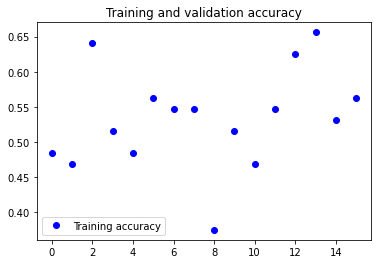

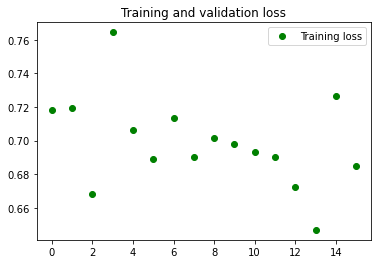

In [23]:
# 정확도 및 손실 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
# plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [24]:
# 모델 저장
model.save('ox_class_cnn.h5')

In [25]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array
from tqdm import tqdm
import pandas as pd
# 테스트용 O 이미지 경로 설정
test_dir = os.path.join(base_dir+'\\test\\test')
test_o_dir = test_dir+'O'
test_x_dir = test_dir+'X'

test_x_filenames = os.listdir(test_x_dir)
test_o_filenames = os.listdir(test_o_dir)

# O,X를 key로, 이미지 파일 이름들을 value로 dictionary 생성
dic_ox_filenames = {}
dic_ox_filenames['O'] = test_o_filenames
dic_ox_filenames['X'] = test_x_filenames


In [26]:
# O/X 분류 테스트
test_OX_list = []
test_output_list = []
for ox, filenames in tqdm(dic_ox_filenames.items()):
#     fig = plt.figure(figsize=(16,10))
    rows, cols = 1, 6
    
    for i, fn in enumerate(filenames):
        path = test_dir + ox + '\\' + fn
        test_img = load_img(path, 
                            color_mode='rgb' # grayscale rgb
                            , target_size=(150, 150), interpolation='bilinear')       
#         print(path)
        x = img_to_array(test_img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])

        classes = model.predict(images, batch_size=10)

#         fig.add_subplot(rows, cols, i+1)
        
        test_OX_list.append(ox)
#         test_output_list.append(classes[0])
        if classes[0]==0:
            test_output_list.append("O")
#             plt.title(fn + " is O")
#             plt.axis('off')
#             plt.imshow(test_img, cmap='gray')

        else:
            test_output_list.append("X")
#             plt.title(fn + " is X")
#             plt.axis('off')
#             plt.imshow(test_img, cmap='gray')
#     plt.show();

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


 50%|██████████████████████████████████████████                                          | 1/2 [00:43<00:43, 43.62s/it]

1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 24ms/step


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:24<00:00, 42.02s/it]


In [27]:
from sklearn.preprocessing import LabelEncoder
# dir(sklearn.metrics)
LE = LabelEncoder()

a = LE.fit_transform(test_OX_list)
b = LE.transform(test_output_list)

In [28]:
test_OX_list[0:50]

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O']

In [29]:
test_output_list[0:50]

['X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X']

In [30]:
import sklearn
from sklearn.metrics import f1_score, accuracy_score

print("정획도",sklearn.metrics.accuracy_score(a , b)) # 테스트 데이터 정확도
print("재현율",sklearn.metrics.recall_score(a, b)) # 테스트 데이터 재현율
print("정밀도",sklearn.metrics.precision_score(a, b)) # 테스트 데이터 
print("f1 스코어",sklearn.metrics.f1_score(a, b)) # 테스트 데이터 f1스코어
# print("r2 스코어",sklearn.metrics.r2_score(a, b)) # 테스트 데이터 f1스코어 (회귀)

정획도 0.47607934655775963
재현율 1.0
정밀도 0.47607934655775963
f1 스코어 0.6450592885375493


In [31]:
sklearn.metrics.roc_auc_score(a,b)

0.5

In [32]:
print((dir(sklearn.metrics)))

['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric', 'PrecisionRecallDisplay', 'RocCurveDisplay', 'SCORERS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_classification', '_dist_metrics', '_pairwise_fast', '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'd2_tweedie_score', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'label_ranking_a

In [33]:
df = pd.DataFrame({"실제":test_OX_list,"예측":test_output_list})
df

,실제,예측
0,O,X
1,O,X
2,O,X
3,O,X
4,O,X
...,...,...
852,X,X
853,X,X
854,X,X
855,X,X


In [34]:
df[["예측"]].describe()

,예측
count,857
unique,1
top,X
freq,857


# 올랐는지 내렸는지 판단 (인베스트) 
### 진입시점을 어디로 할 것인지에 대해 다 다른 답이 나옴.
### 기준은 데이터가 끝나는 시점인 10:00분으로 함.

In [391]:
data_x = pd.read_excel(path+"\\"+"종가 데이터"+"\\"+"종가"+".xlsx") # sheet_name = None 으로 모든 시트 불러옴.

In [392]:

data_x = data_x.loc[data_x["진입종류"]=="매수청산(당일청산)"][["진입일시","진입가격(Pt)"]]
data_x = data_x.rename(columns = {"진입일시":'time',"진입가격(Pt)": "종가데이터"})
data_x['time'] = pd.to_datetime(data_x['time'], format='%Y-%m-%d', errors='raise') # 시간으로 맞추기 
data_x = data_x.sort_values(['time'],ascending= True).drop_duplicates('time').reset_index(drop = True) # 시간컬럼으로 맞추기

In [393]:
data_x.to_csv("올랐는지 내렸는지 판단.csv",index = False)

딥러닝을 위해 사용

In [396]:
data_x = pd.read_csv("올랐는지 내렸는지 판단.csv")
data_x['time'] = pd.to_datetime(data_x['time'], format='%Y-%m-%d', errors='raise') # 시간으로 맞추기 
data_x

,time,종가데이터
0,1999-01-05 15:20:00,71.70
1,1999-01-06 15:20:00,72.50
2,1999-01-07 15:20:00,77.55
3,1999-01-08 15:20:00,76.00
4,1999-01-11 15:20:00,76.70
...,...,...
5972,2023-03-10 15:50:00,311.35
5973,2023-03-13 15:50:00,314.15
5974,2023-03-14 15:50:00,306.90
5975,2023-03-15 15:50:00,310.10
